In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import os
import sys
import numpy as np
import seaborn as sns
import pandas as pd
import locale

# ロケールを日本語に固定
locale.setlocale(locale.LC_TIME, 'ja_JP.UTF-8')

csv_path = '/mnt/c/Documents and Settings/hideki kobayashi/Documents/プログラムに関するメモ/nanG.csv'

# カラム名の指定
columns = ["key", "thread_title", "res_num", "name", "email", "comment_date", "post_id", "comment"]

# データ型の指定
dtype = {"key": "Int64", "thread_title": str, "res_num": "Int64", "name": str, "email": str, "comment_date": str, "post_id": str, "comment": str}

# CSVファイルの読み込み
df = pd.read_csv(csv_path, names=columns, dtype=dtype, parse_dates=["comment_date"], na_values=[""])

# 欠損値の埋め方を指定
df = df.fillna({"key": 0, "res_num": 0})

# 「Over 1000」を除外
df = df[df["comment_date"] != "Over 1000"]
# comment_dateカラムを日付型に変換
df["comment_date"] = pd.to_datetime(df["comment_date"], format="%Y/%m/%d(%a) %H:%M:%S.%f")

# 確認
print(df.dtypes)

key                      Int64
thread_title            object
res_num                  Int64
name                    object
email                   object
comment_date    datetime64[ns]
post_id                 object
comment                 object
dtype: object


In [41]:
nang_hist = df.groupby(["post_id"]).size().reset_index(name="cnt").sort_values(by="cnt", ascending=False)
nang_hist["cnt"]

9784    236
7961    182
41      154
962     148
3633    123
       ... 
8758      1
8757      1
3841      1
8755      1
6979      1
Name: cnt, Length: 13959, dtype: int64

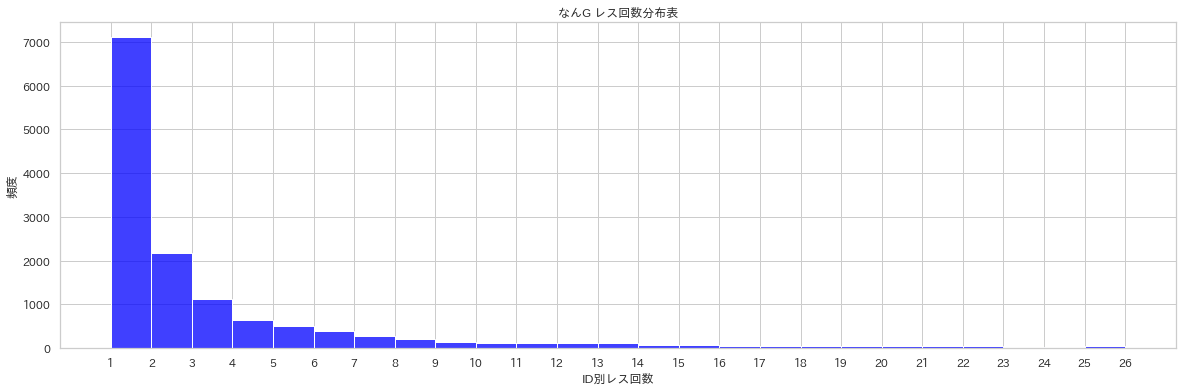

In [62]:
data = nang_hist["cnt"]
data = np.ravel(data)
bins = range(1, 27, 1)
hist, edges = np.histogram(data, bins=bins)
df = pd.DataFrame({'度数': hist, '階級': [f"{int(edges[i])}~{int(edges[i+1])}" for i in range(len(edges)-1)]})

# 可視化する
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid', font='IPAexGothic')
sns.histplot(data, bins=bins, kde=False, color='blue')
plt.title('なんG レス回数分布表')
plt.xlabel('ID別レス回数')
plt.ylabel('頻度')
plt.xticks(bins)
plt.show()

In [55]:
nang_hist = df.groupby(["post_id"]).size().reset_index(name="cnt").sort_values(by="cnt", ascending=False)

KeyError: 'post_id'